**Applied Machine Learning - Homework Question 2**

In this assignment, we aim to develop a salary prediction model based on various employee attributes. The dataset contains columns such as 'Job Title', 'Salary', 'Gender', 'Education Level', 'Age', and 'Years of Experience (YOE)'. By analyzing these features, we seek to understand how different factors influence salary outcomes and develop a model to predict salaries accurately. The analysis includes data preprocessing, handling categorical variables like 'Job Title' and 'Education Level', and applying machine learning techniques to create the predictive model.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset
df=pd.read_csv('Salary_Data.csv')

# **A. Summarize the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical?**

In [3]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [5]:
# Shape of the dataset
print(f'Total number of rows: {df.shape[0]}')
print(f'Total number of columns: {df.shape[1]}')

Total number of rows: 6704
Total number of columns: 6


In [6]:
def categorize_attributes(df):
    continuous = []
    categorical = []

    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            continuous.append(col)
        else:
            categorical.append(col)

    return continuous, categorical

# Categorize attributes
continuous_attrs, categorical_attrs = categorize_attributes(df)

print("Continuous Attributes:", continuous_attrs)
print("Categorical Attributes:", categorical_attrs)

Continuous Attributes: ['Age', 'Years of Experience', 'Salary']
Categorical Attributes: ['Gender', 'Education Level', 'Job Title']


**Question A**

**Answer :** The dataset contains 6704 records and 6 features or columns. The continuous-valued features are Age, Years of Experience and Salary (which is the target variable). The categorical features are Gender, Education Level and Job Title.

# **B. Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so, what special treatment might they require?**

In [7]:
# Count missing values
print("Missing values:")
print(df.isna().sum())

Missing values:
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64


In [8]:
# Counting duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Total number of duplicate rows: {duplicate_rows}")

Total number of duplicate rows: 4912


In [9]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True, drop=True)

In [10]:
duplicate_rows = df.duplicated().sum()
print(f"Total number of duplicate rows: {duplicate_rows}")

Total number of duplicate rows: 0


In [11]:
#Display the number of rows after reducing duplicates
df.shape[0]

1792

In [12]:
def missing_values_percentage(df):
    total_values = df.shape[0]  # Total number of rows in the DataFrame
    missing_percentage = df.isnull().sum() / total_values * 100  # Calculate missing percentage
    return missing_percentage

In [13]:
df_missing_percentage = missing_values_percentage(df)
print(df_missing_percentage)

Age                    0.055804
Gender                 0.055804
Education Level        0.111607
Job Title              0.055804
Years of Experience    0.111607
Salary                 0.223214
dtype: float64


The number of missing values is not significant. We can either drop them or can fill them with median for numerical attributes and frequently ocurring values for categorical attributes.

In [14]:
df[continuous_attrs] = df[continuous_attrs].fillna(df[continuous_attrs].median())
for col in categorical_attrs:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [15]:
print("Missing values:")
print(df.isna().sum())

Missing values:
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


In [16]:
# Display statistical summary for all features
print("Statistical summary of the dataset:")
stats_summary = df.describe()
print(stats_summary)

Statistical summary of the dataset:
               Age  Years of Experience         Salary
count  1792.000000          1792.000000    1792.000000
mean     35.127232             9.151228  113170.193638
std       8.207424             6.836122   51525.624115
min      21.000000             0.000000     350.000000
25%      29.000000             3.000000   70000.000000
50%      33.000000             8.000000  110000.000000
75%      41.000000            13.000000  160000.000000
max      62.000000            34.000000  250000.000000


The descriptive statistics for numerical attributes are shown in the table above.

In [17]:
df['Gender'].value_counts()

,count
Gender,
Male,970
Female,815
Other,7


In [18]:
df['Education Level'].value_counts()

,count
Education Level,
Bachelor's Degree,510
Master's Degree,447
PhD,340
Bachelor's,262
Master's,122
High School,110
phD,1


There seem to be some inconsistencies for each unique value in the 'Education Level' column in naming (e.g., "Bachelor's" vs. "Bachelor's Degree", "phD" vs. "PhD").
We shall standardize these values.

In [19]:
df['Education Level'] = df['Education Level'].replace({
    "phD": "PhD",
    "Bachelor's": "Bachelor's Degree",
    "Master's": "Master's Degree",
})

In [20]:
df['Job Title'].value_counts()

,count
Job Title,
Software Engineer Manager,128
Full Stack Engineer,123
Senior Software Engineer,96
Senior Project Engineer,95
Back end Developer,81
...,...
Financial Advisor,1
Junior Designer,1
Chief Technology Officer,1


There are around 193 Job titles in the dataset. We shall check its correlation with our target variable (salary) and decide whether to drop the column or keep it.

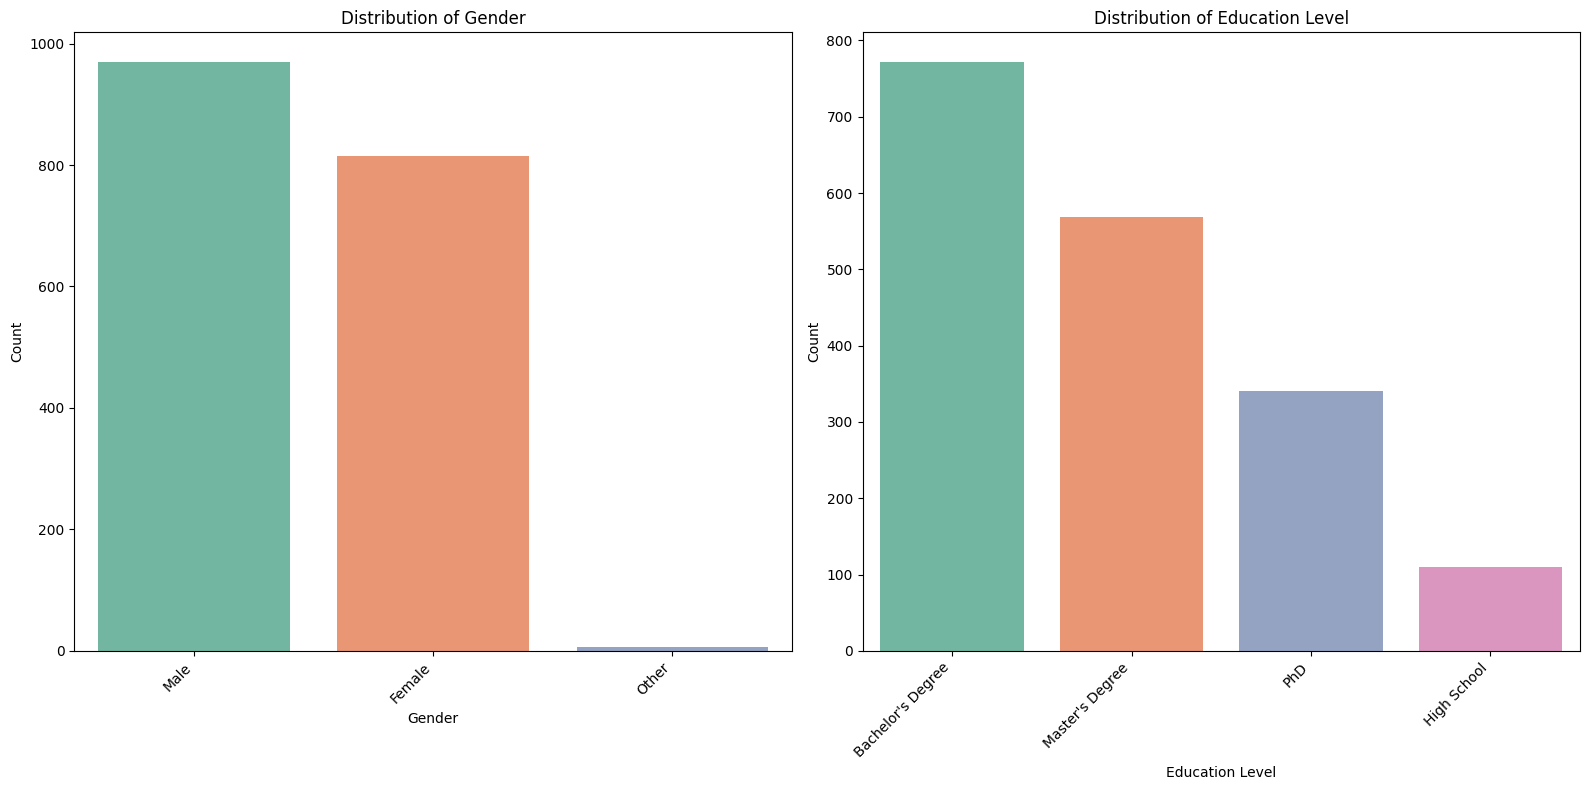

In [21]:
plt.figure(figsize=(16, 8))

# First subplot for Gender distribution
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
sns.countplot(x='Gender', data=df,palette='Set2')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Second subplot for Education Level distribution
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
sns.countplot(x='Education Level', data=df,palette='Set2')
plt.title('Distribution of Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Automatically adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


1) From the first plot, we can understand that the workforce is male dominated as compared to female or the Other gender. There's a smaller count for the Other gender category.


2)From the 2nd bar plot, we can understand that the majority hold a Bachelor's Degree, followed by those with a Master's Degree. Fewer individuals have a PhD or a High School education.

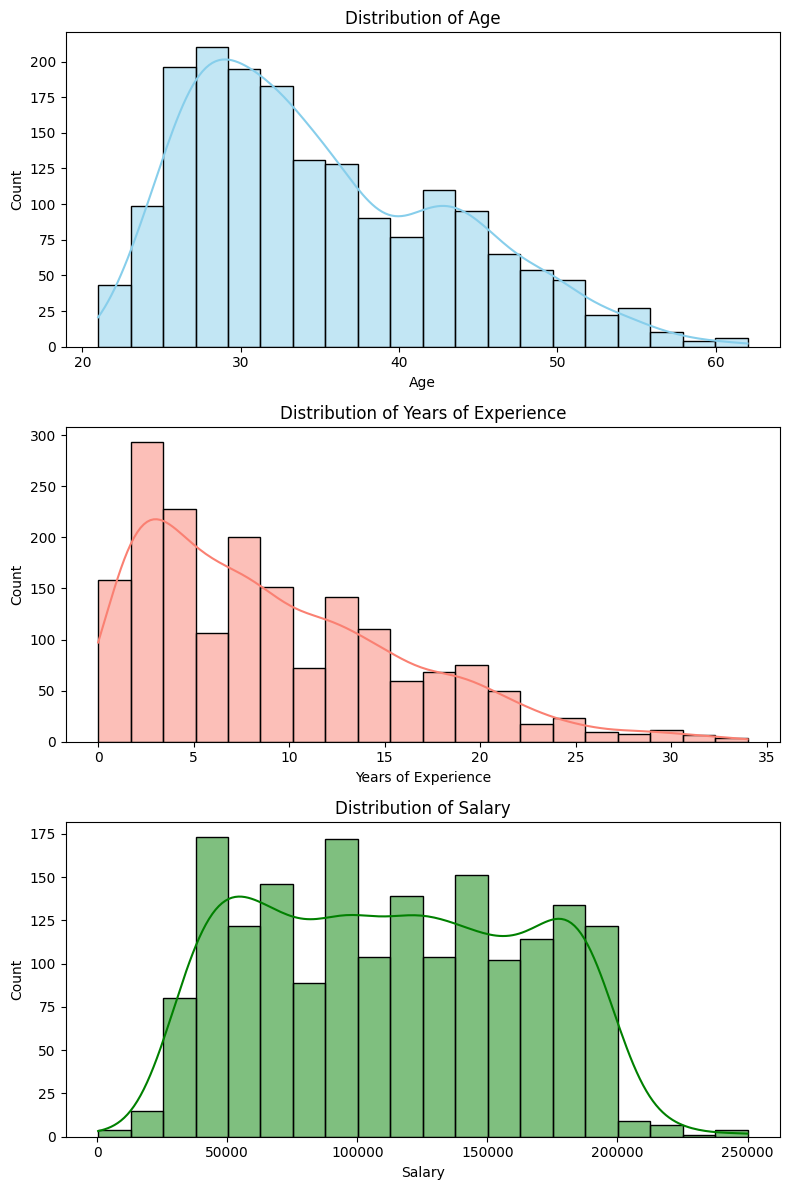

In [22]:
# Plot histograms for features

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))
sns.histplot(df['Age'], bins=20, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Age')

sns.histplot(df['Years of Experience'], bins=20, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribution of Years of Experience')

sns.histplot(df['Salary'], bins=20, kde=True, ax=axes[2], color='green')
axes[2].set_title('Distribution of Salary')

# Adjust layout
plt.tight_layout()
plt.show()

Distribution of continuous variables:

Age Distribution: It shows that majority of workforce lies in the 25-35 age range.

Years of Experience Distribution: The plot shows that the majority workforce has around 1-4 years of experience.

Salary Distribution: There is a lot of different pay ranges within the community

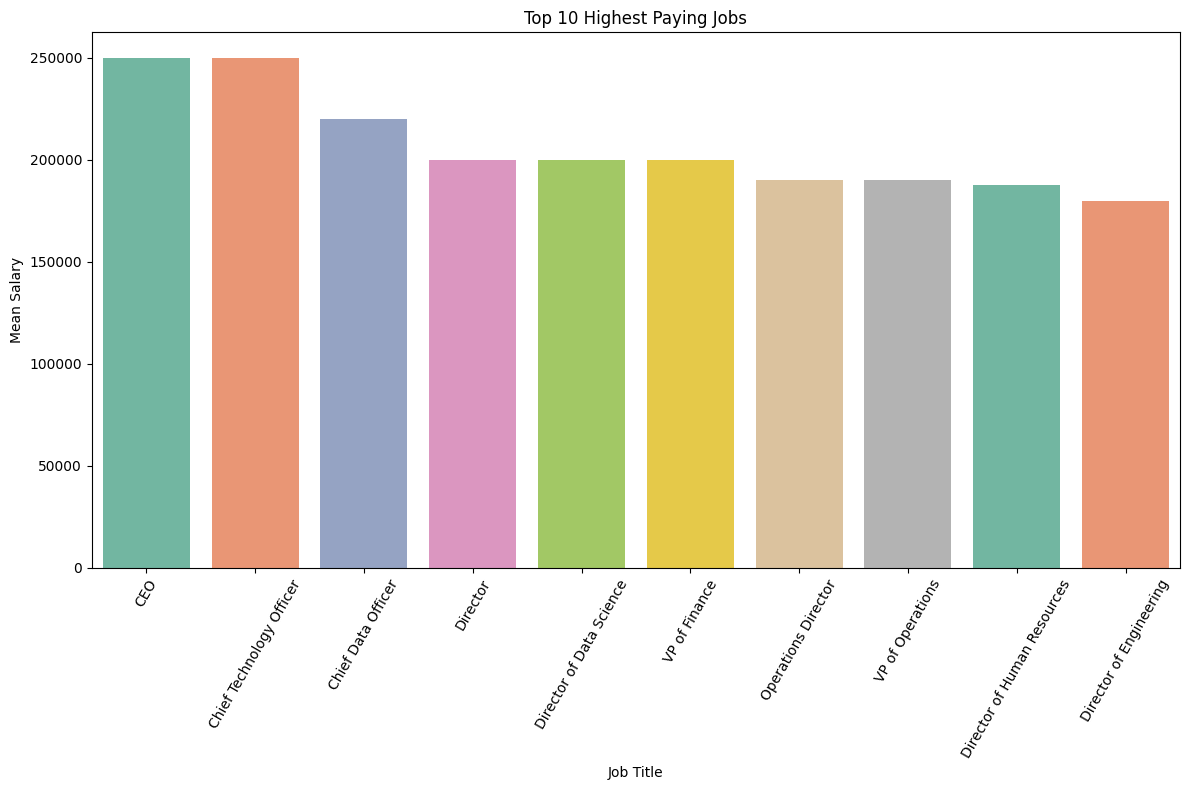

In [23]:
# Get the top 10 job titles with the highest mean salary
top_10_highest_paying_jobs = df.groupby('Job Title')['Salary'].mean().nlargest(10)

# Create a single bar plot for the top 10 highest paying job titles and their mean salaries
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_highest_paying_jobs.index, y=top_10_highest_paying_jobs.values,palette='Set2')

# Customize the plot
plt.xlabel('Job Title')
plt.ylabel('Mean Salary')
plt.title('Top 10 Highest Paying Jobs')
plt.xticks(rotation=60)  # Rotate x-axis labels if needed

# Show the plot
plt.tight_layout()
plt.show()

The above bar plot displays the job titles with the highest paying salaries where the topmost job titles are CEO and CTO

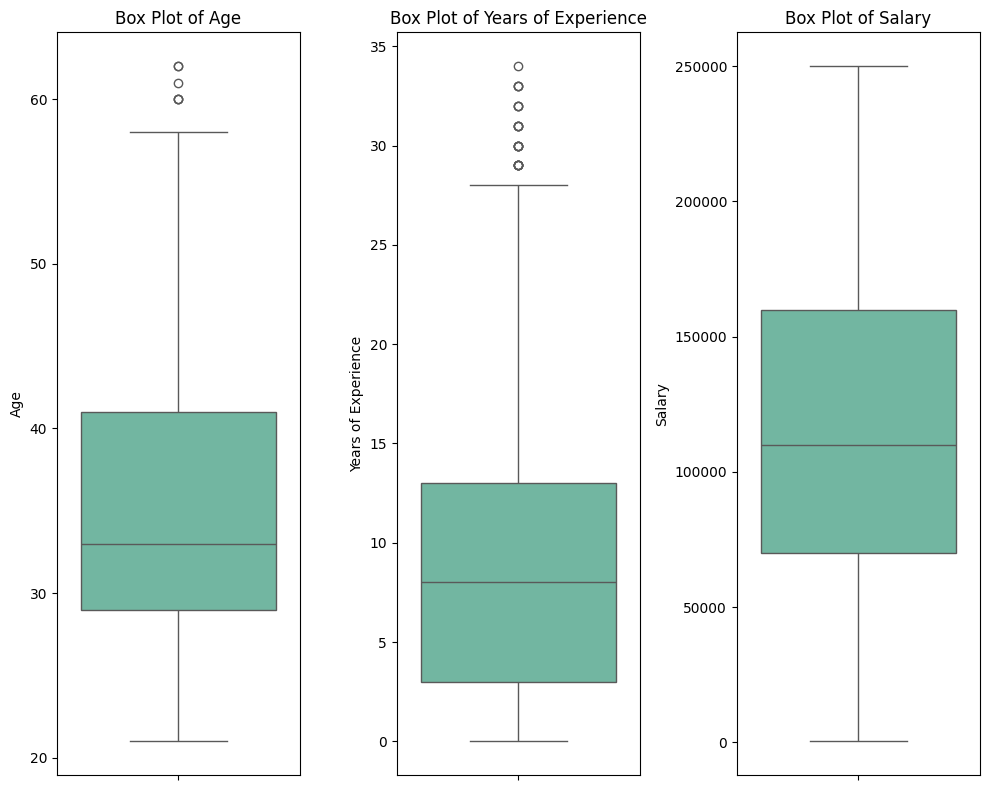

In [24]:
plt.figure(figsize=(10, 8))
for i, column in enumerate(continuous_attrs, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=column,data=df,palette='Set2')
    plt.title(f'Box Plot of {column}')

fig.suptitle('Relationship between a single factor and salary', fontsize=16)
plt.tight_layout()
plt.show()

From the above boxplots, following conclusions can be made:

1)The median age is slightly above 30.
The interquartile range (IQR) is between around 28 and 42 years. There are a few outliers above 60 which are indicated by the circles.

2)The median years of experience is around 10.
The IQR is between approximately 3 and 12 years of experience.
Several outliers with more than 25 years of experience are visible.

3)The median salary is around 100,000.
The IQR is between roughly 75,000 and 155,000.




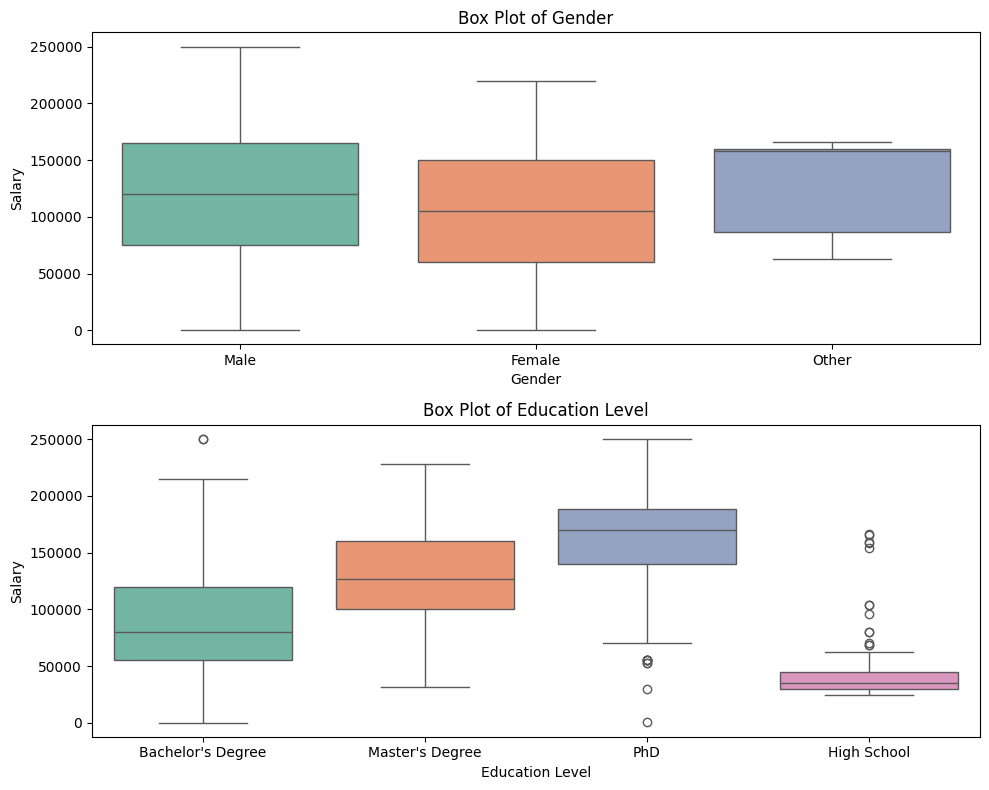

In [25]:
features = ['Gender', 'Education Level']

plt.figure(figsize=(10, 8))
for i, column in enumerate(features, 1):
    plt.subplot(2, 1, i)
    sns.boxplot(x=column,y='Salary',data=df,palette='Set2')
    plt.title(f'Box Plot of {column}')

fig.suptitle('Relationship between a single factor and salary', fontsize=16)
plt.tight_layout()
plt.show()

From the above plots, the following conclusions can be made:

1)The median salary for males appears to be higher than for females, with the range of values spread from around 0 to 250,000.
 The "Other" category shows less extreme maximums and minimums

2) As the education level rises, the mean salary level also rises. PhD holders tend to have the highest median salary, followed by those with a Master's Degree and Bachelor's Degree.
Individuals with only a High School education generally have the lowest salaries, with less variation compared to higher education levels.

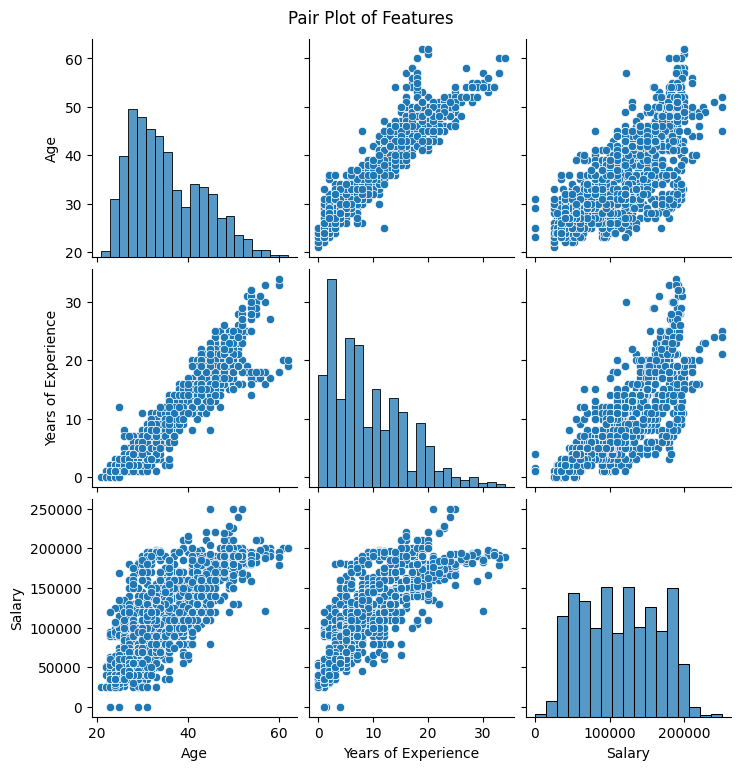

In [26]:
# Pair Plot of Features
pair_plot = sns.pairplot(df)
pair_plot.fig.suptitle('Pair Plot of Features', y=1.02)
plt.show()

Above are some of the visualizations, including histograms, box plots, pair plot for the features, bar plot for Salary dataset.

From the pair plot, it is visible that the data is linearly correlated.

The special treatment required for the attributes is

1) removing outliers

2) converting the categorical attributes to numerical attributes

We shall determine the correlation between the attributes with the target feature that is the 'salary' and then keep the attributes which are the more correlated with it.

In [27]:
#Converting categorical to numerical attributes
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
for col in categorical_attrs:
    df[col]=le.fit_transform(df[col])

In [28]:
features=['Age','Years of Experience','Salary','Education Level',]

In [29]:
#Function for removing outliers

def remove_outliers_iqr(df, features):

    df_cleaned = df.copy()

    for column in features:
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1

        # Determine outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter the DataFrame based on the current column
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]

    return df_cleaned

df_cleaned = remove_outliers_iqr(df, features)

print("Original shape:", df.shape)
print("Cleaned shape:", df_cleaned.shape)

Original shape: (1792, 6)
Cleaned shape: (1766, 6)


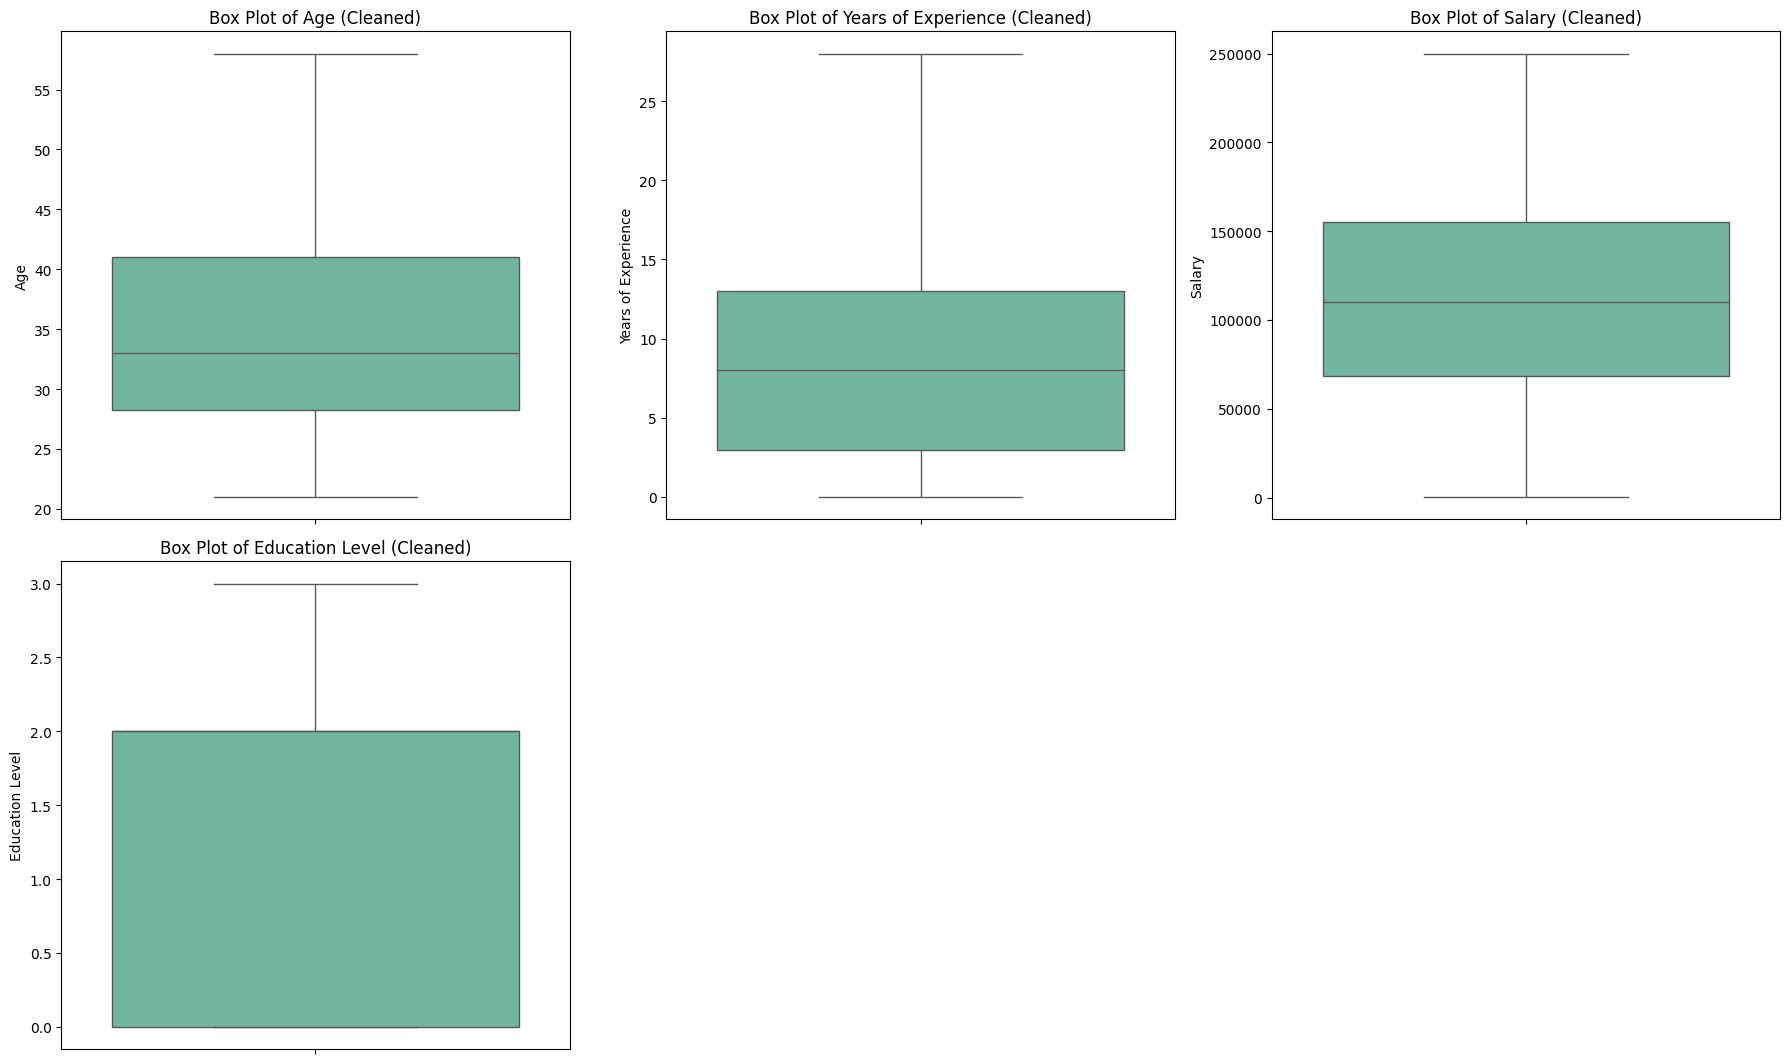

In [30]:
# Plot box plots for features after removing outliers
plt.figure(figsize=(18, 16))
for i, column in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(df_cleaned[column], palette='Set2')
    plt.title(f'Box Plot of {column} (Cleaned)')
plt.tight_layout()
plt.show()

# **C. Analyze the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.**

In [31]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [32]:
# Define the attributes list with escaped single quotes
attributes = [
    'Age',
    'Years of Experience',
    'Education Level',
    'Gender',
    'Job Title',
]
label='Salary'

In [33]:
correlation_matrix = df[attributes + [label]].corr()
pcc_with_label = correlation_matrix[label].drop(label)
pcc_table = pd.DataFrame({
'Feature': pcc_with_label.index,
'Pearson Correlation Coefficient': pcc_with_label.values
})
print(pcc_table)


               Feature  Pearson Correlation Coefficient
0                  Age                         0.766480
1  Years of Experience                         0.818694
2      Education Level                         0.520499
3               Gender                         0.104486
4            Job Title                         0.152093


Text(0.5, 1.0, 'Heatmap of Correlation Matrix (Cleaned Data)')

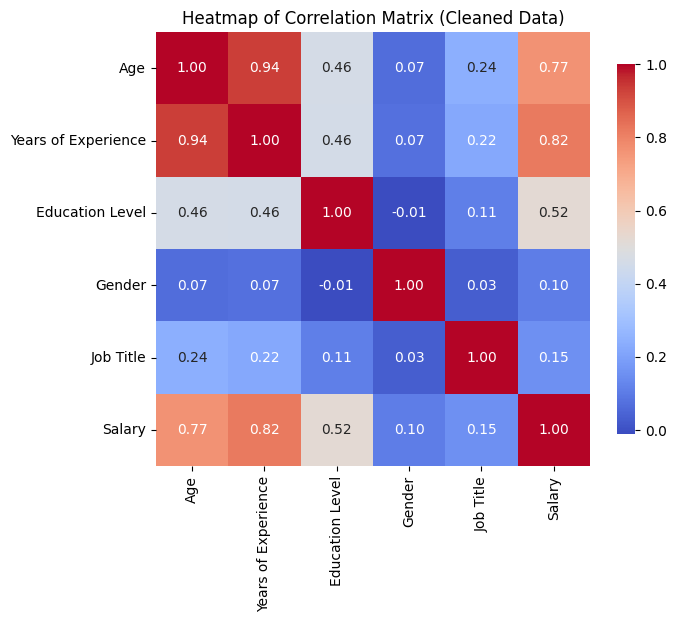

In [34]:
plt.figure(figsize=(7, 6))

# Generate the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

plt.title('Heatmap of Correlation Matrix (Cleaned Data)')

Above is the computed correlation matrix & heatmap of correlation matrix.

We can see that columns 'Years of Experience' and 'Age' are strongly correlated with 'Salary' (values of 0.82 and 0.77 respectively) while features like 'Gender' and 'Job Title' holds lesser correlation(values of 0.10 and 0.15 respectively). 'Education Level' is moderately correlated (0.52) with 'Salary'

'Age' and 'Years of Experience are highly correlated, indicating that older people have more experience

We shall drop the fetures of 'Job title' and 'Gender'.

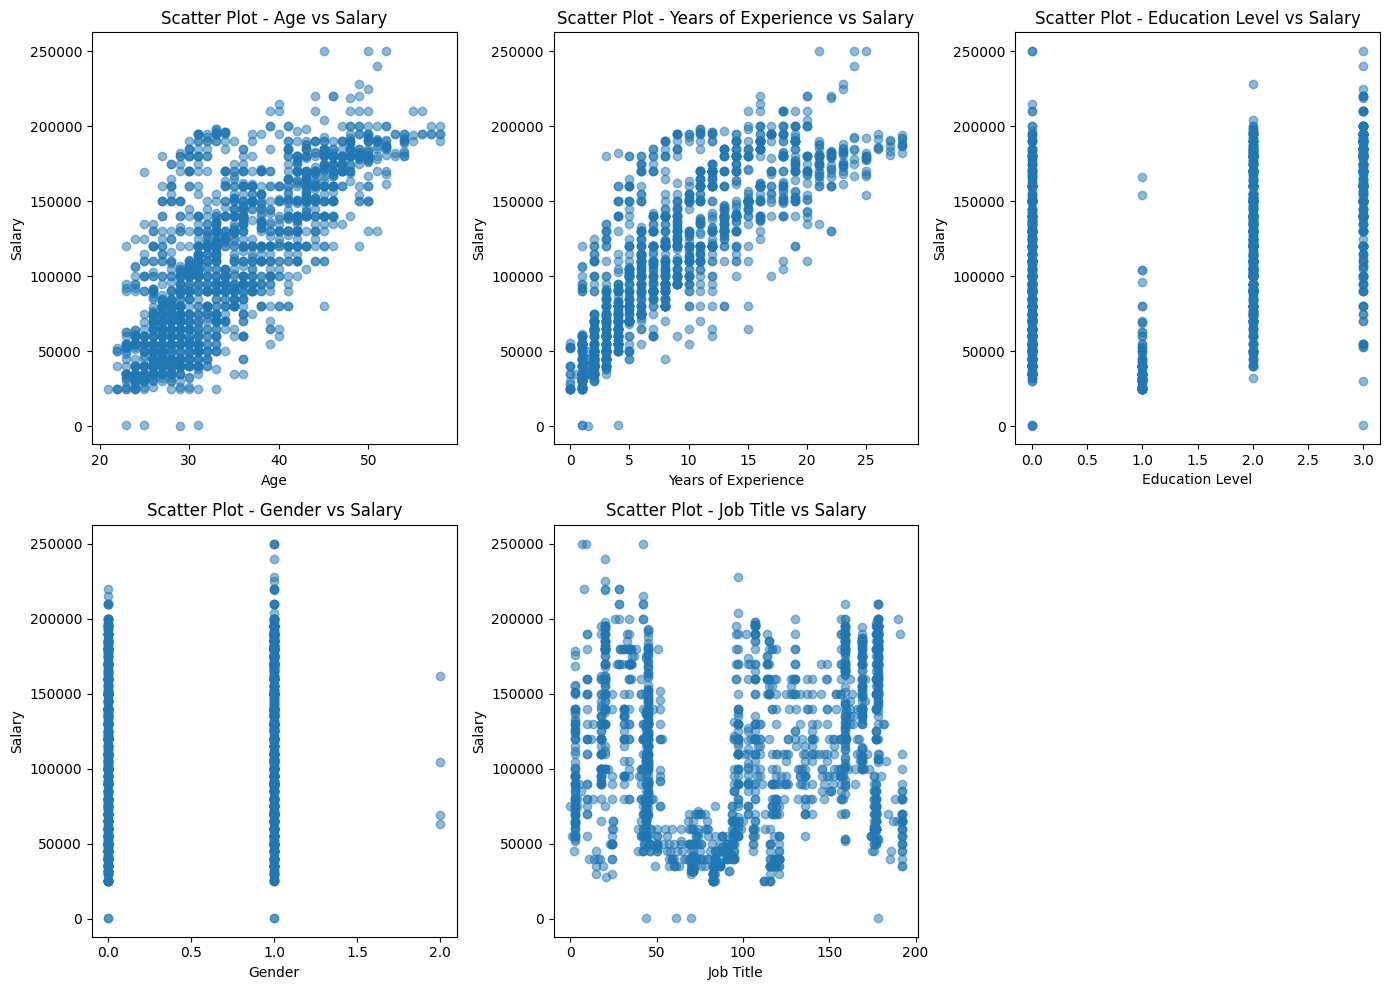

In [35]:
# Create scatter plots to visualize relationships
plt.figure(figsize=(14, 10))
for i, feature in enumerate(attributes, 1):
    plt.subplot(2, 3, i)
    plt.scatter(df_cleaned[feature], df_cleaned[label], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel(label)
    plt.title(f'Scatter Plot - {feature} vs {label}')
plt.tight_layout()
plt.show()

# **D. Select 25% of the data for testing. Describe how you did that and verify that your test portion of the data is representative of the entire dataset.**

In [36]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,177,5.0,90000.0
1,28.0,0,2,18,3.0,65000.0
2,45.0,1,3,145,15.0,150000.0
3,36.0,0,0,116,7.0,60000.0
4,52.0,1,2,26,20.0,200000.0


In [37]:
# Shuffle the dataset

df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Creating training and testing sets. Dropping columns Gender and Job Title since tehy aren't relevant for predicting salary
X = df_shuffled.drop(columns=['Salary','Gender','Job Title'])
y = df_shuffled['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [38]:
X.head()

,Age,Education Level,Years of Experience
0,29.0,0,5.0
1,31.0,0,3.0
2,33.0,0,9.0
3,27.0,0,5.0
4,29.0,3,5.0


In [39]:
y.head()

,Salary
0,105000.0
1,45000.0
2,117904.0
3,150000.0
4,100000.0


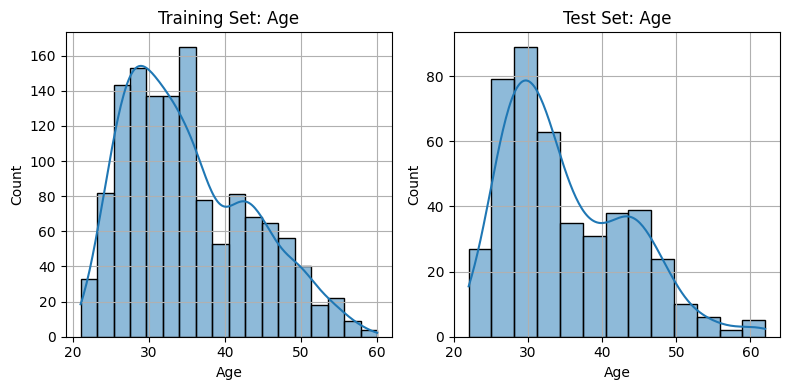

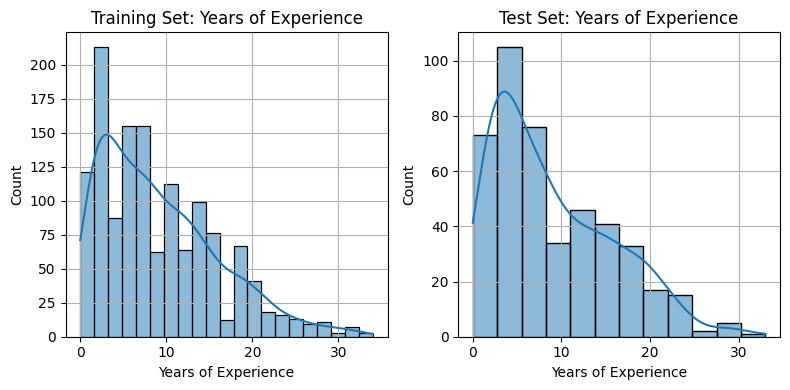

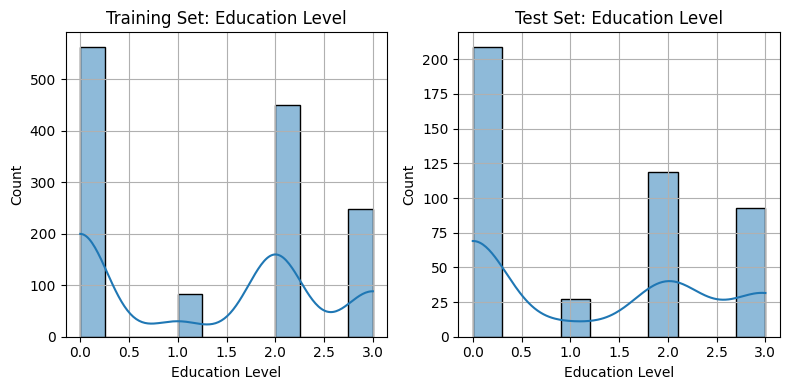

In [40]:
key_attributes = ['Age', 'Years of Experience', 'Education Level']
for attribute in key_attributes:
    plt.figure(figsize=(8, 4))

    # Training Set
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[attribute], kde=True)
    plt.title(f'Training Set: {attribute}')
    plt.grid()

    # Test Set
    plt.subplot(1, 2, 2)
    sns.histplot(X_test[attribute], kde=True)
    plt.title(f'Test Set: {attribute}')
    plt.grid()

    plt.tight_layout()
    plt.show()

**Question D**\
**Answer :** To select 25% of the data for testing, we first shuffled the dataset to mix up the rows and ensure randomness. Then, we used the train_test_split function from Scikit-Learn to automatically divide the data into training and test sets, with 25% allocated to the test set. This approach ensures that the test data is a random sample, increasing its representativeness. We also checked the shape of both the training and test sets to confirm their sizes and compared the distributions of key features between the two sets to ensure they reflect the characteristics of the entire dataset.

In [41]:
# Print the shapes of the datasets
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1344, 3)
y_train shape: (1344,)
X_test shape: (448, 3)
y_test shape: (448,)


In [42]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **E. Train a Linear Regression model using the training data with three-fold cross-validation using appropriate evaluation metric. Do this with a closed-form solution (using the Normal Equation or SVD) and with SGD. Perform Ridge, Lasso and Elastic Net regularization – try three values of penalty term and describe its impact. Explore the impact of other hyperparameters, like batch size and learning rate (no need for grid search). Describe your findings. For SGD, display the training and validation loss as a function of training iteration.**

**Question-E Part 1**

Linear Regression (Closed Form) - Test MSE: 745338846.0879, CV MSE: 827144737.9909, R² Score: 0.7208


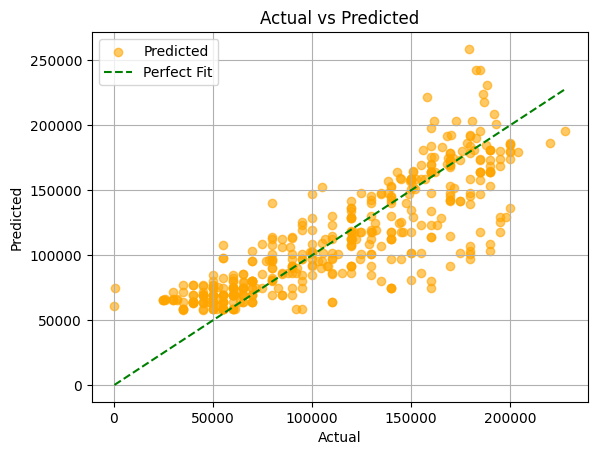

In [43]:
# Linear Regression (Closed Form)
linear_model = LinearRegression()

# K-Fold Cross Validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)
cv_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')
mean_cv_mse = -cv_scores.mean()

linear_model.fit(X_train_scaled, y_train)

y_test_pred = linear_model.predict(X_test_scaled)
test_mse_linear = mean_squared_error(y_test, y_test_pred)
r2_linear = r2_score(y_test, y_test_pred)
print(f"Linear Regression (Closed Form) - Test MSE: {test_mse_linear:.4f}, CV MSE: {mean_cv_mse:.4f}, R² Score: {r2_linear:.4f}")

plt.scatter(y_test, y_test_pred, alpha=0.6, c='orange', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'g--', label='Perfect Fit')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()

SGD Regressor - Test MSE: 745468781.1004, CV MSE: 827093096.6117, R² Score: 0.7207


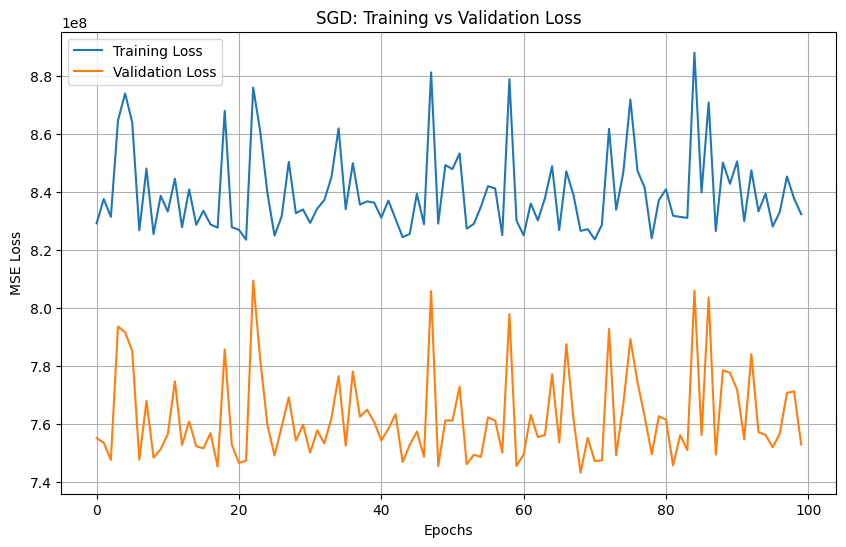

In [58]:
# SGD Regressor
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, learning_rate='adaptive', eta0=0.01)

# K-Fold Cross Validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)
cv_scores = cross_val_score(sgd_model, X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')
mean_cv_mse = -cv_scores.mean()

sgd_model.fit(X_train_scaled, y_train)

y_test_pred = sgd_model.predict(X_test_scaled)
test_mse_sgd = mean_squared_error(y_test, y_test_pred)
r2_sgd = r2_score(y_test, y_test_pred)

print(f"SGD Regressor - Test MSE: {test_mse_sgd:.4f}, CV MSE: {mean_cv_mse:.4f}, R² Score: {r2_sgd:.4f}")

train_losses, val_losses = [], []

for epoch in range(100):
    # Shuffle training data for each epoch
    indices = np.random.permutation(len(X_train_scaled))
    X_train_shuffled, y_train_shuffled = X_train_scaled[indices], y_train.iloc[indices]

    # Mini-batch gradient descent
    batch_size = 32
    for i in range(0, len(X_train_shuffled), batch_size):
        X_batch = X_train_shuffled[i:i + batch_size]
        y_batch = y_train_shuffled.iloc[i:i + batch_size]
        sgd_model.partial_fit(X_batch, y_batch)

    train_losses.append(mean_squared_error(y_train, sgd_model.predict(X_train_scaled)))
    val_losses.append(mean_squared_error(y_test, sgd_model.predict(X_test_scaled)))

plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('SGD: Training vs Validation Loss')
plt.legend()
plt.grid()
plt.show()

**Question-E Part 2**

In [45]:
def train_ridge(X_train, y_train, X_test, y_test, alphas):
    best_test_mse = float('inf')
    best_r2 = float('-inf')

    for alpha in alphas:
        ridge_model = Ridge(alpha=alpha)

        # Cross-validation
        kf = KFold(n_splits=3, shuffle=True, random_state=42)
        cv_scores = cross_val_score(ridge_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
        mean_cv_mse = -cv_scores.mean()

        # Fit the model
        ridge_model.fit(X_train, y_train)

        y_test_pred = ridge_model.predict(X_test)
        test_mse_ridge = mean_squared_error(y_test, y_test_pred)
        r2_ridge = r2_score(y_test, y_test_pred)

        print(f"Ridge Regression (alpha={alpha}) - Test MSE: {test_mse_ridge:.4f}, CV MSE: {mean_cv_mse:.4f}, R² Score: {r2_ridge:.4f}")

        if test_mse_ridge < best_test_mse:
            best_test_mse = test_mse_ridge
            best_r2 = r2_ridge

    return best_test_mse, best_r2

def train_lasso(X_train, y_train, X_test, y_test, alphas):
    best_test_mse = float('inf')
    best_r2 = float('-inf')

    for alpha in alphas:
        lasso_model = Lasso(alpha=alpha)

        # Cross-validation
        kf = KFold(n_splits=3, shuffle=True, random_state=42)
        cv_scores = cross_val_score(lasso_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
        mean_cv_mse = -cv_scores.mean()

        # Fit the model
        lasso_model.fit(X_train, y_train)
        y_test_pred = lasso_model.predict(X_test)
        test_mse_lasso = mean_squared_error(y_test, y_test_pred)
        r2_lasso = r2_score(y_test, y_test_pred)

        print(f"Lasso Regression (alpha={alpha}) - Test MSE: {test_mse_lasso:.4f}, CV MSE: {mean_cv_mse:.4f}, R² Score: {r2_lasso:.4f}")

        if test_mse_lasso < best_test_mse:
            best_test_mse = test_mse_lasso
            best_r2 = r2_lasso

    return best_test_mse, best_r2

def train_elasticnet(X_train, y_train, X_test, y_test, alphas):
    best_test_mse = float('inf')
    best_r2 = float('-inf')

    for alpha in alphas:
        elastic_model = ElasticNet(alpha=alpha, l1_ratio=0.5)

        # Cross-validation
        kf = KFold(n_splits=3, shuffle=True, random_state=42)
        cv_scores = cross_val_score(elastic_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
        mean_cv_mse = -cv_scores.mean()

        # Fit the model
        elastic_model.fit(X_train, y_train)
        y_test_pred = elastic_model.predict(X_test)
        test_mse_elastic = mean_squared_error(y_test, y_test_pred)
        r2_elastic = r2_score(y_test, y_test_pred)

        print(f"ElasticNet Regression (alpha={alpha}) - Test MSE: {test_mse_elastic:.4f}, CV MSE: {mean_cv_mse:.4f}, R² Score: {r2_elastic:.4f}")

        if test_mse_elastic < best_test_mse:
            best_test_mse = test_mse_elastic
            best_r2 = r2_elastic

    return best_test_mse, best_r2

# Penalty terms
alphas = [0.01, 0.1, 1.0]

# Train models and capture best scores
best_mse_ridge, best_r2_ridge = train_ridge(X_train_scaled, y_train, X_test_scaled, y_test, alphas)
best_mse_lasso, best_r2_lasso = train_lasso(X_train_scaled, y_train, X_test_scaled, y_test, alphas)
best_mse_elastic, best_r2_elastic = train_elasticnet(X_train_scaled, y_train, X_test_scaled, y_test, alphas)

Ridge Regression (alpha=0.01) - Test MSE: 745342254.8039, CV MSE: 827144272.5238, R² Score: 0.7208
Ridge Regression (alpha=0.1) - Test MSE: 745372970.3570, CV MSE: 827140238.3884, R² Score: 0.7207
Ridge Regression (alpha=1.0) - Test MSE: 745683672.6290, CV MSE: 827114728.9558, R² Score: 0.7206
Lasso Regression (alpha=0.01) - Test MSE: 745339113.9398, CV MSE: 827144733.3655, R² Score: 0.7208
Lasso Regression (alpha=0.1) - Test MSE: 745341525.0234, CV MSE: 827144739.4551, R² Score: 0.7208
Lasso Regression (alpha=1.0) - Test MSE: 745365666.8779, CV MSE: 827144232.9105, R² Score: 0.7207
ElasticNet Regression (alpha=0.01) - Test MSE: 747777422.6605, CV MSE: 827234463.2859, R² Score: 0.7198
ElasticNet Regression (alpha=0.1) - Test MSE: 769870984.2948, CV MSE: 836536873.0018, R² Score: 0.7116
ElasticNet Regression (alpha=1.0) - Test MSE: 874172781.4036, CV MSE: 922378656.6788, R² Score: 0.6725


**Impact of different penalty terms :**

1. **Ridge Regression:** Ridge Regression performed consistently increasing across all penalty values (alpha).As the alpha increases, the Test MSE slightly increases (from 745.3M to 745.7M).
The R² score slightly decreases from 0.7208 to 0.7206, showing that stronger regularization slightly reduces the model's performance.
This suggests that the model is fairly robust to changes in alpha for small values

2. **Lasso Regression:** The Test MSE remains almost constant across the different alpha values (around 745.3M).
The R² score is 0.7208 for alpha values of 0.01 and 0.1, and decreases slightly to 0.7207 for alpha = 1.0.
This indicates that Lasso is not sensitive to these alpha values in this case, and increasing regularization does not significantly affect performance, possibly due to the dataset not containing many irrelevant features to shrink to zero.

3. **ElasticNet Regression:** ElasticNet is more sensitive to changes in alpha. Increasing alpha causes a noticeable increase in Test MSE and a significant drop in R² score, especially at alpha = 1.0, suggesting that the combined L1 and L2 penalties have a stronger impact when applied together, leading to over-regularization and underfitting at higher values.

**Question-E Part 3**

In [59]:
# Hyperparameter exploration for SGD Regressor with Mini-Batch Gradient Descent and CV MSE calculation
def explore_hyperparameters(X_train, y_train, X_test, y_test, learning_rates, batch_sizes):
    results = []
    kf = KFold(n_splits=3, shuffle=True, random_state=42)  # Initialize KFold cross-validation

    for lr in learning_rates:
        for batch_size in batch_sizes:
            model = SGDRegressor(max_iter=1000, tol=1e-3, learning_rate='constant', eta0=lr)

            # K-Fold Cross-Validation for model evaluation (CV MSE)
            cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
            mean_cv_mse = -cv_scores.mean()

            # Mini-batch gradient descent
            for epoch in range(100):
                indices = np.random.permutation(len(X_train))
                X_train_shuffled, y_train_shuffled = X_train[indices], y_train.iloc[indices]

                for i in range(0, len(X_train_shuffled), batch_size):
                    X_batch = X_train_shuffled[i:i + batch_size]
                    y_batch = y_train_shuffled.iloc[i:i + batch_size]
                    model.partial_fit(X_batch, y_batch)

            # Test MSE and R² score
            y_test_pred = model.predict(X_test)
            test_mse = mean_squared_error(y_test, y_test_pred)
            r2 = r2_score(y_test, y_test_pred)

            results.append((lr, batch_size, test_mse, r2, mean_cv_mse))
            print(f"Learning Rate: {lr}, Batch Size: {batch_size}, Test MSE: {test_mse:.4f}, R² Score: {r2:.4f}, CV MSE: {mean_cv_mse:.4f}")

    return results

# Define learning rates and batch sizes for exploration
learning_rates = [0.01, 0.1, 1.0]
batch_sizes = [16, 32, 64]

# Run hyperparameter exploration
results_hyperparameters = explore_hyperparameters(X_train_scaled, y_train, X_test_scaled, y_test, learning_rates, batch_sizes)

Learning Rate: 0.01, Batch Size: 16, Test MSE: 750765843.6914, R² Score: 0.7187, CV MSE: 830023724.4399
Learning Rate: 0.01, Batch Size: 32, Test MSE: 749929674.1126, R² Score: 0.7190, CV MSE: 839455025.0846
Learning Rate: 0.01, Batch Size: 64, Test MSE: 747817092.2009, R² Score: 0.7198, CV MSE: 836429157.6895
Learning Rate: 0.1, Batch Size: 16, Test MSE: 977646262.5756, R² Score: 0.6337, CV MSE: 1393143640.3238
Learning Rate: 0.1, Batch Size: 32, Test MSE: 798712913.5824, R² Score: 0.7008, CV MSE: 1072188254.1175
Learning Rate: 0.1, Batch Size: 64, Test MSE: 1712823693.8986, R² Score: 0.3583, CV MSE: 1204729846.4219
Learning Rate: 1.0, Batch Size: 16, Test MSE: 2086468453523595406082048.0000, R² Score: -781696412555406.0000, CV MSE: 7451828959120490913333248.0000
Learning Rate: 1.0, Batch Size: 32, Test MSE: 19027744042525440107085824.0000, R² Score: -7128753483881248.0000, CV MSE: 2831338630665883443265536.0000
Learning Rate: 1.0, Batch Size: 64, Test MSE: 8205187499642702075527168.0

 **Key Observations:**

1. **Learning Rate = 0.01:**
   - The model performs **consistently well** across different batch sizes.
   - As the batch size increases (16, 32, 64), both the **Test MSE** (750.7M to 747.8M) and **R² score** (0.7187 to 0.7198) improve slightly.
   - This suggests that the model is stable with a lower learning rate, regardless of batch size.

2. **Learning Rate = 0.1:**
   - The model's performance **worsens** significantly with a higher learning rate.
   - Test MSE and R² decrease sharply, especially for **batch size 64** (Test MSE = 1.71B, R² = 0.3583).
   - This indicates that a learning rate of 0.1 is too large, leading to poorer generalization and potential overfitting/underfitting depending on the batch size.

3. **Learning Rate = 1.0:**
   - The model **completely breaks down** with an extremely high learning rate.
   - Test MSE and R² scores are **astronomically large negative values**, indicating severe divergence.
   - The learning rate of 1.0 causes the model to update too aggressively, leading to numerical instability and exploding gradients.

 **Summary:**
- A **learning rate of 0.01** works best with relatively stable performance across batch sizes.
- Increasing the learning rate to **0.1** or **1.0** causes the model to degrade significantly, with extremely poor performance at **1.0**, indicating a strong sensitivity to large learning rates in this setup.


1. **Linear Regression (Closed Form):** This model fits a straight line through the data to predict salaries based on the input features. It calculates the best-fit line using a mathematical solution, making it efficient and accurate for datasets where relationships between variables are linear.

2. **Stochastic Gradient Descent (SGD) Regressor:** A flexible model that adjusts its predictions iteratively by processing the data in small batches. It's particularly suited for large datasets, as it updates model parameters after each mini-batch, converging to the optimal solution more efficiently than batch gradient methods.

3. **Ridge Regression:** Similar to Linear Regression, Ridge adds a regularization penalty to prevent the model from overfitting by discouraging large coefficients. This makes the model more robust, especially when features are correlated or when the model could otherwise become too complex.

4. **Lasso Regression:** Lasso applies an even stronger regularization, setting some feature coefficients to zero. This helps in feature selection by effectively eliminating less important features from the model, making it more interpretable.

5. **ElasticNet Regression:** A hybrid of Ridge and Lasso, ElasticNet combines their strengths by balancing both feature selection and regularization. It works well when there are multiple correlated features or when a mix of small and zeroed-out coefficients is desired.


# **F. Repeat everything from part E with polynomial regression and using SGD. Using validation loss, explore if your model overfits/underfits the data.**

**Question-F Part 1**

In [47]:
degree=2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print(f"X_train_poly shape: {X_train_poly.shape}")
print(f"X_test_poly shape: {X_test_poly.shape}")

X_train_poly shape: (1344, 10)
X_test_poly shape: (448, 10)


Polynomial Regression (Normal Equation, Degree 2) - Test MSE: 560782374.7894, CV MSE: 591306259.0148, R² Score: 0.7899


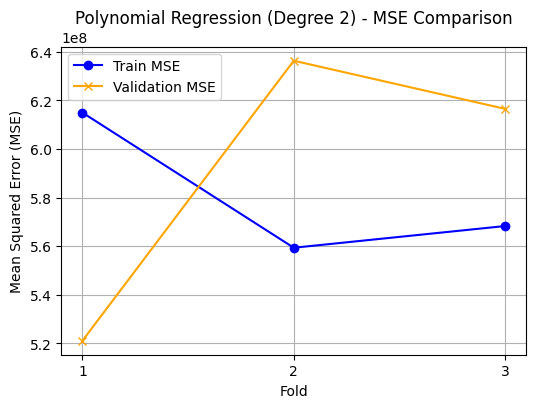

In [48]:
# Polynomial Regression with Normal Equation
model = LinearRegression()

kf = KFold(n_splits=3, shuffle=True, random_state=42)

train_losses, val_losses = [], []

for train_index, val_index in kf.split(X_train_poly):
    X_train_kf, X_val_kf = X_train_poly[train_index], X_train_poly[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

    model.fit(X_train_kf, y_train_kf)

    train_mse = mean_squared_error(y_train_kf, model.predict(X_train_kf))
    val_mse = mean_squared_error(y_val_kf, model.predict(X_val_kf))

    train_losses.append(train_mse)
    val_losses.append(val_mse)

cv_mse = np.mean(val_losses)
test_mse_poly_ne = mean_squared_error(y_test, model.predict(X_test_poly))
r2_poly_ne = r2_score(y_test, model.predict(X_test_poly))

print(f"Polynomial Regression (Normal Equation, Degree {degree}) - Test MSE: {test_mse_poly_ne:.4f}, CV MSE: {cv_mse:.4f}, R² Score: {r2_poly_ne:.4f}")

epochs = np.arange(1, len(train_losses) + 1)
plt.figure(figsize=(6, 4))
plt.plot(epochs, train_losses, label='Train MSE', marker='o', color='blue')
plt.plot(epochs, val_losses, label='Validation MSE', marker='x', color='orange')
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error (MSE)')
plt.title(f'Polynomial Regression (Degree {degree}) - MSE Comparison')
plt.xticks(epochs)
plt.legend()
plt.grid()
plt.show()

Polynomial Regression (SGD, Degree 2) - Test MSE: 555782799.8215, CV MSE: 590930330.6019, R² Score: 0.7918


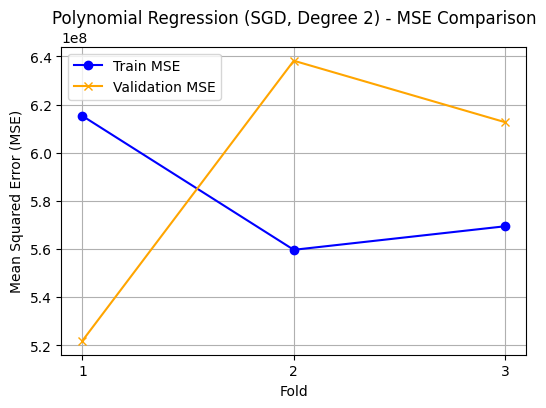

In [49]:
# Polynomial Regression with SGD
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42, learning_rate='adaptive', eta0=0.01)

kf = KFold(n_splits=3, shuffle=True, random_state=42)

train_losses, val_losses = [], []

for train_index, val_index in kf.split(X_train_poly):
    X_train_kf, X_val_kf = X_train_poly[train_index], X_train_poly[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

    sgd_model.fit(X_train_kf, y_train_kf)

    train_mse = mean_squared_error(y_train_kf, sgd_model.predict(X_train_kf))
    val_mse = mean_squared_error(y_val_kf, sgd_model.predict(X_val_kf))

    train_losses.append(train_mse)
    val_losses.append(val_mse)

cv_mse = np.mean(val_losses)
test_mse_poly_sgd = mean_squared_error(y_test, sgd_model.predict(X_test_poly))
r2_poly_sgd = r2_score(y_test, sgd_model.predict(X_test_poly))

print(f"Polynomial Regression (SGD, Degree {degree}) - Test MSE: {test_mse_poly_sgd:.4f}, CV MSE: {cv_mse:.4f}, R² Score: {r2_poly_sgd:.4f}")

epochs = np.arange(1, len(train_losses) + 1)
plt.figure(figsize=(6, 4))
plt.plot(epochs, train_losses, label='Train MSE', marker='o', color='blue')
plt.plot(epochs, val_losses, label='Validation MSE', marker='x', color='orange')
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error (MSE)')
plt.title(f'Polynomial Regression (SGD, Degree {degree}) - MSE Comparison')
plt.xticks(epochs)
plt.legend()
plt.grid()
plt.show()

**Question-F Part 2**

In [50]:
# Function to evaluate Ridge, Lasso, and ElasticNet with Polynomial Features
def evaluate_models_with_poly_kfold(models, alphas):
    best_scores = {
        'Ridge Regression': {'best_mse': float('inf'), 'best_r2': float('-inf')},
        'Lasso Regression': {'best_mse': float('inf'), 'best_r2': float('-inf')},
        'ElasticNet Regression': {'best_mse': float('inf'), 'best_r2': float('-inf')}
    }

    best_ridge_model = None
    best_lasso_model = None
    best_elasticnet_model = None

    train_losses = {'Ridge Regression': [], 'Lasso Regression': [], 'ElasticNet Regression': []}
    val_losses = {'Ridge Regression': [], 'Lasso Regression': [], 'ElasticNet Regression': []}

    for model_name, model_class in models.items():
        for alpha in alphas:
            model = model_class(alpha=alpha)
            kf = KFold(n_splits=3, shuffle=True, random_state=42)
            fold_train_losses = []
            fold_val_losses = []

            for train_index, val_index in kf.split(X_train_poly):
                X_train_kf, X_val_kf = X_train_poly[train_index], X_train_poly[val_index]
                y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

                model.fit(X_train_kf, y_train_kf)

                train_mse = mean_squared_error(y_train_kf, model.predict(X_train_kf))
                val_mse = mean_squared_error(y_val_kf, model.predict(X_val_kf))

                fold_train_losses.append(train_mse)
                fold_val_losses.append(val_mse)

            # Store mean of train/val losses for the current alpha
            train_losses[model_name].append(np.mean(fold_train_losses))
            val_losses[model_name].append(np.mean(fold_val_losses))

            # Evaluate on test set
            test_predictions = model.predict(X_test_poly)
            test_mse = mean_squared_error(y_test, test_predictions)
            r2_value = r2_score(y_test, test_predictions)

            print(f"{model_name} (alpha={alpha}) - Test MSE: {test_mse:.4f}, "
                  f"CV Train MSE: {np.mean(fold_train_losses):.4f}, "
                  f"CV Val MSE: {np.mean(fold_val_losses):.4f}, R² Score: {r2_value:.4f}")

            # Update best scores and models for each model type
            if model_name == 'Ridge Regression' and test_mse < best_scores[model_name]['best_mse']:
                best_scores[model_name]['best_mse'] = test_mse
                best_scores[model_name]['best_r2'] = r2_value
                best_ridge_model = model

            if model_name == 'Lasso Regression' and test_mse < best_scores[model_name]['best_mse']:
                best_scores[model_name]['best_mse'] = test_mse
                best_scores[model_name]['best_r2'] = r2_value
                best_lasso_model = model

            if model_name == 'ElasticNet Regression' and test_mse < best_scores[model_name]['best_mse']:
                best_scores[model_name]['best_mse'] = test_mse
                best_scores[model_name]['best_r2'] = r2_value
                best_elasticnet_model = model

    return (best_scores, best_ridge_model, best_lasso_model, best_elasticnet_model)

# Models and alpha values
models = {
    'Ridge Regression': Ridge,
    'Lasso Regression': Lasso,
    'ElasticNet Regression': ElasticNet
}

alphas = [0.01, 0.1, 1.0]

# Evaluate models and return scores
best_scores, best_ridge_model, best_lasso_model, best_elasticnet_model = evaluate_models_with_poly_kfold(models, alphas)

# Print final results
print("\nBest Scores:", best_scores)

Ridge Regression (alpha=0.01) - Test MSE: 560747382.4196, CV Train MSE: 580872907.1200, CV Val MSE: 591298850.7471, R² Score: 0.7899
Ridge Regression (alpha=0.1) - Test MSE: 560441840.1987, CV Train MSE: 580875713.1578, CV Val MSE: 591235942.6882, R² Score: 0.7900
Ridge Regression (alpha=1.0) - Test MSE: 558168584.1593, CV Train MSE: 581123447.1852, CV Val MSE: 590927848.8295, R² Score: 0.7909
Lasso Regression (alpha=0.01) - Test MSE: 560776421.2130, CV Train MSE: 580872878.5849, CV Val MSE: 591304884.1585, R² Score: 0.7899
Lasso Regression (alpha=0.1) - Test MSE: 560766407.4290, CV Train MSE: 580872880.3266, CV Val MSE: 591302941.6488, R² Score: 0.7899
Lasso Regression (alpha=1.0) - Test MSE: 560666527.4974, CV Train MSE: 580873015.6975, CV Val MSE: 591284265.0184, R² Score: 0.7899
ElasticNet Regression (alpha=0.01) - Test MSE: 556740936.6374, CV Train MSE: 584442903.1538, CV Val MSE: 593032007.5277, R² Score: 0.7914
ElasticNet Regression (alpha=0.1) - Test MSE: 624936693.9706, CV Tra

**Impact of Different Penalty Terms on Salary Dataset:**

1. **Ridge Regression:**  
   Ridge regression showed stable and reliable performance across various alpha values. With a lower alpha of 0.01, the model achieved a Test MSE of **560.7M** and a CV Validation MSE of **591.3M**, while at an alpha of 1.0, the Test MSE slightly improved to **558.1M** and the CV Validation MSE to **590.9M**. This suggests that Ridge regression can handle regularization effectively without sacrificing much accuracy, even with stronger penalties. The **R² Score** consistently stayed around **0.79**, showing Ridge’s ability to balance bias and variance well across different penalty values.

2. **Lasso Regression:**  
   Lasso regression performed similarly across alpha values but did not show as much benefit from regularization compared to Ridge. With an alpha of 0.01, the Test MSE was **560.7M**, and the CV Validation MSE was **591.3M**. As the alpha increased to 1.0, the performance remained nearly identical, with a Test MSE of **560.6M** and a CV Validation MSE of **591.2M**. The **R² Score** remained consistent at **0.7899**. These results indicate that Lasso did not eliminate many features and thus behaved similarly to Ridge in this context, offering minimal improvements from feature selection.

3. **ElasticNet Regression:**  
   ElasticNet exhibited the best performance with a small alpha of 0.01, achieving a Test MSE of **556.7M** and a CV Validation MSE of **593.0M**, with an **R² Score** of **0.7914**. However, as the alpha increased to 0.1, the model’s performance dropped, with a Test MSE of **624.9M** and a CV Validation MSE of **657.7M**. At an alpha of 1.0, the model’s performance worsened further, with a Test MSE of **835.0M** and a CV Validation MSE of **859.0M**, showing that ElasticNet struggles with higher penalties. This indicates that while ElasticNet performs well at lower penalty values, stronger regularization causes it to underfit, leading to higher errors and lower **R² Scores**.

**Summary:**  
Ridge regression maintained strong and consistent performance across different alpha values, showing minimal sensitivity to the penalty term. Lasso regression, while stable, did not show significant gains from its feature selection properties. ElasticNet performed the best at lower penalties, but higher alpha values led to worse performance, highlighting the importance of careful tuning to avoid underfitting.

**Question-F Part 3**

In [51]:
# Polynomial Regression with SGD with varying learning rates and batch sizes
learning_rates = [0.01, 0.1, 1.0]
batch_sizes = [16, 32, 64]

for lr in learning_rates:
    for batch_size in batch_sizes:
        model = SGDRegressor(learning_rate='constant', eta0=lr, max_iter=1000, tol=1e-3)
        kf = KFold(n_splits=3, shuffle=True, random_state=42)
        val_losses = []

        for train_index, val_index in kf.split(X_train_poly):
            X_train_kf, X_val_kf = X_train_poly[train_index], X_train_poly[val_index]
            y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

            for i in range(0, len(X_train_kf), batch_size):
                end = min(i + batch_size, len(X_train_kf))
                model.partial_fit(X_train_kf[i:end], y_train_kf[i:end])

            val_mse = mean_squared_error(y_val_kf, model.predict(X_val_kf))
            val_losses.append(val_mse)

        # Evaluate on the test set
        test_predictions = model.predict(X_test_poly)
        test_mse = mean_squared_error(y_test, test_predictions)
        r2_value = r2_score(y_test, test_predictions)

        print(f"SGD (LR: {lr}, Batch Size: {batch_size}) - Test MSE: {test_mse:.4f}, "
              f"CV MSE: {np.mean(val_losses):.4f}, R² Score: {r2_value:.4f}")

SGD (LR: 0.01, Batch Size: 16) - Test MSE: 635831439.3769, CV MSE: 686572322.6115, R² Score: 0.7618
SGD (LR: 0.01, Batch Size: 32) - Test MSE: 618319749.5104, CV MSE: 694597830.2615, R² Score: 0.7683
SGD (LR: 0.01, Batch Size: 64) - Test MSE: 724952257.4987, CV MSE: 718119146.8010, R² Score: 0.7284
SGD (LR: 0.1, Batch Size: 16) - Test MSE: 584598620568669485268992.0000, CV MSE: 421897736465664696123392.0000, R² Score: -219020155186927.4375
SGD (LR: 0.1, Batch Size: 32) - Test MSE: 615910779642748434644992.0000, CV MSE: 846406032226085498781696.0000, R² Score: -230751270687972.2812
SGD (LR: 0.1, Batch Size: 64) - Test MSE: 160931817412562945835008.0000, CV MSE: 778392387719178659823616.0000, R² Score: -60293183021756.8594
SGD (LR: 1.0, Batch Size: 16) - Test MSE: 152685563516740926768676864.0000, CV MSE: 136092413619654986777493504.0000, R² Score: -57203720021970304.0000
SGD (LR: 1.0, Batch Size: 32) - Test MSE: 88236768718374757837307904.0000, CV MSE: 55990829241573529742213120.0000, R

**Findings:**

The results show a clear influence of learning rate and batch size on the performance of the Stochastic Gradient Descent (SGD) model. At a **learning rate of 0.01**:

- A **batch size of 32** performed the best, achieving a Test MSE of **618.3M** and a CV MSE of **694.6M**, with an **R² score of 0.7683**.
- A smaller batch size of **16** resulted in a slightly worse performance with a Test MSE of **635.8M** and CV MSE of **686.6M**.
- Increasing the batch size to **64** led to a noticeable drop in performance, with a Test MSE of **724.9M** and CV MSE of **718.1M**, along with a lower **R² score of 0.7284**. This indicates that while a smaller batch size gives more accurate updates, very large batch sizes can slow down convergence.

However, when the learning rate was increased to **0.1** or **1.0**, the model's performance drastically deteriorated across all batch sizes. The Test MSE and CV MSE values ballooned to extremely large numbers, such as **584.6 quadrillion** for Test MSE with a learning rate of 0.1 and batch size of 16. This suggests that the model struggled to converge at higher learning rates, likely overshooting the optimal solution.

In summary, a **learning rate of 0.01** with **moderate batch sizes (16-32)** provides more reliable results, while excessively high learning rates caused the model to fail to fit the data properly. Careful tuning of both learning rate and batch size is essential for maintaining stability and improving the predictive power of the SGD regressor.

For Learning Rate 0.01:

The model's performance across different batch sizes is reasonably consistent, with Test MSE and CV MSE values relatively close to each other.
The R² scores are within an acceptable range (0.7284 to 0.7683), indicating that the model captures a significant portion of the variance in the data.
The gap between Test MSE and CV MSE is small, suggesting that the model generalizes well on unseen data, with no clear signs of overfitting or underfitting. This indicates that the model is well-tuned for this learning rate.
For Learning Rate 0.1 and 1.0:

The model's performance drastically deteriorates, as seen in the extremely large Test MSE and CV MSE values. These values indicate that the model is failing to converge properly, leading to poor fits at these higher learning rates.
The negative R² scores (e.g., -219020155186927.4375) for learning rates 0.1 and 1.0 further suggest that the model is doing much worse than a horizontal line (no predictive power). This can be attributed to the model's inability to learn effectively at these higher learning rates, likely over-shooting the optimal solution.


# **G. Make predictions of the labels on the test data, using the trained model with chosen hyperparameters. Summarize performance using the appropriate evaluation metric. Discuss the results. Include thoughts about what further can be explored to increase performance.**

**Question-G Part -1 & 2**

In [52]:
# Create a summary table for MSE and R² values for all models
results = {
    "Model": [
        "Linear Regression (Closed Form)",
        "SGD Regressor",
        "Ridge Regression",
        "Lasso Regression",
        "ElasticNet Regression",
        "Polynomial Regression with Normal Equation",
        "Polynomial Regression with SGD",
        "Polynomial Regression Ridge",
        "Polynomial Regression Lasso",
        "Polynomial Regression ElasticNet"
    ],

    "Test MSE": [
        test_mse_linear,
        test_mse_sgd,
        best_mse_ridge,
        best_mse_lasso,
        best_mse_elastic,
        test_mse_poly_ne,
        test_mse_poly_sgd,
        best_scores['Ridge Regression']['best_mse'],
        best_scores['Lasso Regression']['best_mse'],
        best_scores['ElasticNet Regression']['best_mse'],
    ],

    "R² Score": [
        r2_linear,
        r2_sgd,
        best_r2_ridge,
        best_r2_lasso,
        best_r2_elastic,
        r2_poly_ne,
        r2_poly_sgd,
        best_scores['Ridge Regression']['best_r2'],
        best_scores['Lasso Regression']['best_r2'],
        best_scores['ElasticNet Regression']['best_r2'],
    ],
}

# Convert the dictionary to a DataFrame
results_df = pd.DataFrame(results)

# Display the results in a tabular form
print("Model Performance Summary:")
print(results_df)

Model Performance Summary:
                                        Model      Test MSE  R² Score
0             Linear Regression (Closed Form)  7.453388e+08  0.720758
1                               SGD Regressor  7.454525e+08  0.720716
2                            Ridge Regression  7.453423e+08  0.720757
3                            Lasso Regression  7.453391e+08  0.720758
4                       ElasticNet Regression  7.477774e+08  0.719845
5  Polynomial Regression with Normal Equation  5.607824e+08  0.789903
6              Polynomial Regression with SGD  5.557828e+08  0.791776
7                 Polynomial Regression Ridge  5.581686e+08  0.790882
8                 Polynomial Regression Lasso  5.606665e+08  0.789946
9            Polynomial Regression ElasticNet  5.567409e+08  0.791417


**Conclusion:**

1. The best-performing model is **Polynomial Regression with SGD**, achieving the lowest Test MSE of **5.557828e+08** and the highest R² score of **0.791776**. This indicates that the model is effective at capturing complex patterns in the data, leading to improved predictions compared to other models.

2. **Polynomial Regression with Normal Equation** and **Ridge Regression** also performed well, with Test MSEs of **5.607824e+08** and **5.581686e+08**, respectively. Both models demonstrated a significant improvement in performance over traditional linear regression, which had a Test MSE of **7.453388e+08** and an R² score of **0.720758**.

3. Regularization techniques like **Ridge, Lasso**, and **ElasticNet** contributed to better performance compared to standard linear regression. For instance, while Lasso Regression achieved a Test MSE of **5.606665e+08**, ElasticNet had a slightly lower performance with a Test MSE of **5.567409e+08**. This shows the effectiveness of regularization in preventing overfitting and enhancing generalization to new data.


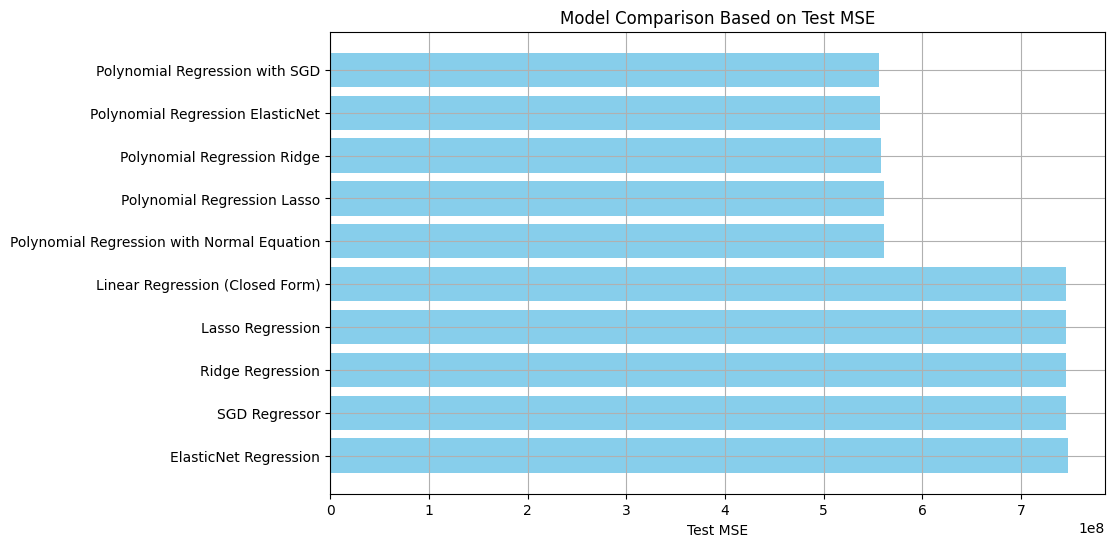

In [53]:
results_df_sorted = results_df.sort_values(by="Test MSE", ascending=False)

# Plotting the Test MSE for each model
plt.figure(figsize=(10, 6))
plt.barh(results_df_sorted["Model"], results_df_sorted["Test MSE"], color='skyblue')
plt.xlabel('Test MSE')
plt.title('Model Comparison Based on Test MSE')
plt.grid(True)
plt.show()

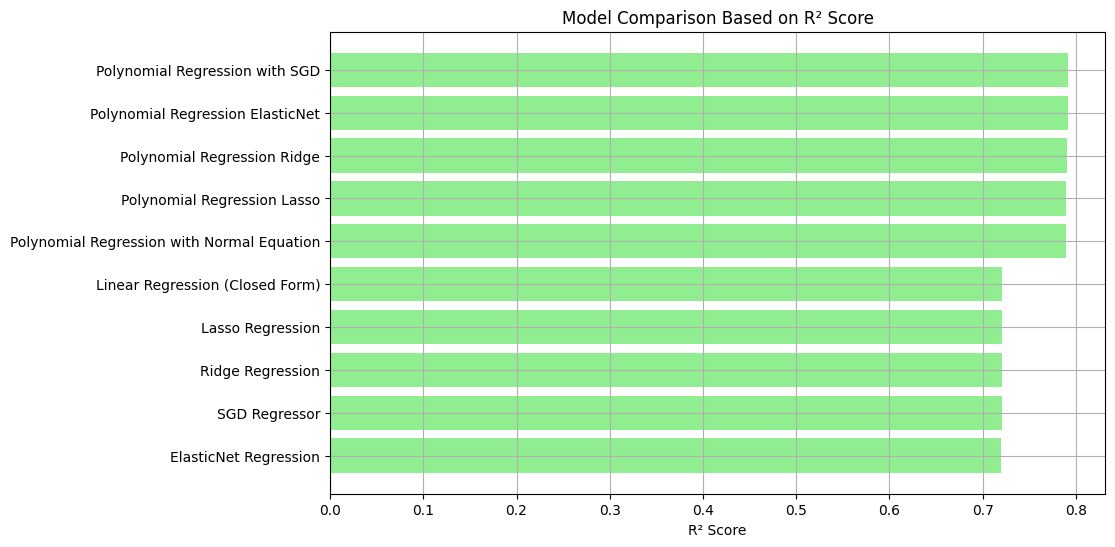

In [54]:
# Sort the DataFrame by 'R² Score' in ascending order
results_df_sorted_r2 = results_df.sort_values(by="R² Score", ascending=True)

# Plotting the R² Score for each model
plt.figure(figsize=(10, 6))
plt.barh(results_df_sorted_r2["Model"], results_df_sorted_r2["R² Score"], color='lightgreen')
plt.xlabel('R² Score')
plt.title('Model Comparison Based on R² Score')
plt.grid(True)
plt.show()

**Prediction on the Test Labels**

In [60]:
# Make predictions using the best model - Polynomial Regression with SGD

best_sgd_model = SGDRegressor(learning_rate='adaptive', eta0=0.01, max_iter=1000, tol=1e-3,random_state=42)
best_sgd_model.fit(X_train_poly, y_train)
y_pred_lasso = best_sgd_model.predict(X_test_poly)  # X_test_poly - test features

test_mse_lasso = mean_squared_error(y_test, y_pred_lasso)  # y_test - actual test labels
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Best Model: Polynomial Regression with SGD")
print(f"Test MSE: {test_mse_lasso:.4f}")
print(f"R² Score: {r2_lasso:.4f}")

# Create a DataFrame for actual vs predicted results
results_df_lasso = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_lasso
})

print("\nActual vs Predicted Results ->")
print("\n")
print(results_df_lasso.to_string(index=True))

Best Model: Polynomial Regression with SGD
Test MSE: 551074446.6187
R² Score: 0.7935

Actual vs Predicted Results ->


        Actual      Predicted
628    55000.0   57254.975563
220   170000.0  104707.613654
1057   26000.0   27400.996032
438    65000.0   71719.704485
1472  195000.0  221727.546063
1611  125000.0   98475.991523
722   158254.0  170614.619308
701    90000.0  114584.173424
1235  130000.0  108785.962137
1524  200000.0  224577.050973
785    65000.0   53817.894596
1114   50000.0   76488.436333
1780   45000.0   72634.600036
1536   40000.0   40684.015737
1620   35000.0   62043.810817
942   100000.0  165212.657041
339   135000.0  159403.705326
173    60000.0   57776.439694
1326  185000.0  176611.467315
1465   70000.0   92448.734511
1263  160000.0  174201.489798
1197   40000.0   53059.529214
203    55000.0   74791.337855
1378  150000.0  104924.332007
1654   35000.0   39421.477433
212   161621.0  181714.659255
617   170000.0  174179.701901
162   190000.0  175064.130538
694   17000

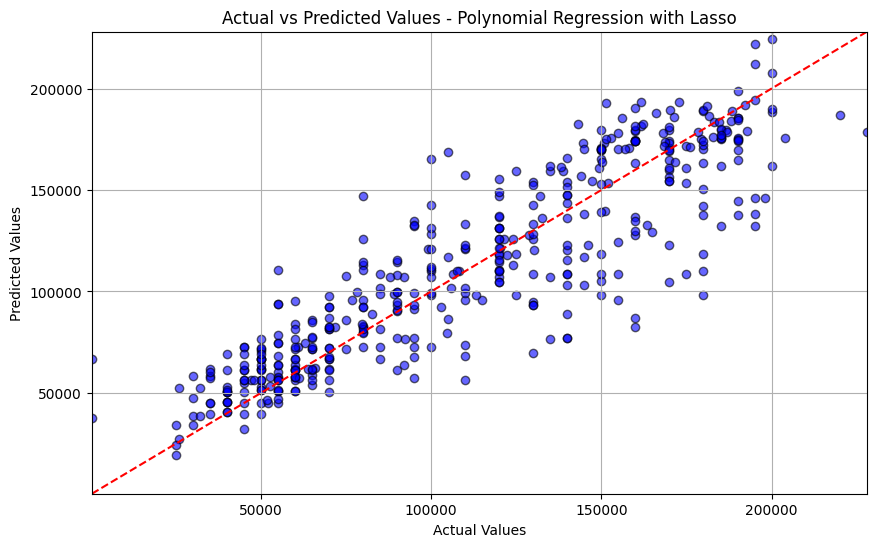

In [61]:
# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, alpha=0.6, color='blue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted Values - Polynomial Regression with Lasso')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.xlim([y_test.min(), y_test.max()])
plt.ylim([y_test.min(), y_test.max()])
plt.show()

**Future Work**

1. **Hyperparameter Tuning:**
   - Further refinement of hyperparameters, such as the learning rate for the SGD model or alpha values for Ridge, Lasso, and ElasticNet, could lead to better results. Implementing systematic techniques like grid search or random search can facilitate testing various combinations to find the optimal settings.

2. **Exploring Ensemble Methods:**
   - Investigating ensemble techniques, such as Random Forests or Gradient Boosting, can be beneficial. These methods are adept at managing complex relationships within the data and may yield improved predictions. Additionally, leveraging model stacking or blending could enhance overall performance by combining the strengths of different models.

3. **Cross-Validation Enhancements:**
   - Implementing more sophisticated cross-validation strategies, such as stratified k-fold cross-validation, can ensure a better assessment of the model's performance across different subsets of the data, particularly in cases of imbalanced datasets.

4. **Experimenting with Regularization Techniques:**
   - Investigating additional regularization techniques or variations of existing methods (like Group Lasso or Adaptive Lasso) could enhance the model's robustness, particularly in high-dimensional settings where multicollinearity is a concern.